### Demonstration of Gauge Invariance of Action

The purpose of this notebook is to demonstrate the gauge invariance of the action, allow the choice dg = 0 to be made.

In [175]:
import sympy

sympy.init_printing()

In [176]:
syms = sympy.symbols("r psi theta phi")
r, psi, theta, phi = syms

In [177]:
L = sympy.symbols("L")  # AdS length scale
r_0 = sympy.symbols("r_0")

In [178]:
# spherical part of the metric
g = sympy.Function('g')(r)
dg = sympy.diff(g, r)
ddg = sympy.diff(dg, r)

# solution
g_sol = r ** 2 + r_0 ** 2
dg_sol = sympy.diff(g_sol, r)
ddg_sol = sympy.diff(dg_sol, r)

In [179]:
# radial part of the metric
f = sympy.Function('f')(r)
df = sympy.diff(f, r)

# solution
f_sol = (L ** 2 + r ** 2 + 2 * r_0 ** 2) / L ** 2
df_sol = sympy.diff(f_sol, r)

In [180]:
# gauge field
Phi = sympy.Function('Phi')(r)
dPhi = sympy.diff(Phi, r)
ddPhi = sympy.diff(dPhi, r)

ddPhi_sol = (8 * Phi - dPhi * df * g - dPhi * dg * f) / (2 * f * g)

In [181]:
delta_f = sympy.Function('delta_f')(r)
ddelta_f = sympy.diff(delta_f, r)

In [182]:
delta_g = sympy.Function('delta_g')(r)
ddelta_g = sympy.diff(delta_g, r)
dddelta_g = sympy.diff(ddelta_g, r)

In [183]:
delta_Phi = sympy.Function('delta_Phi')(r)
ddelta_Phi = sympy.diff(delta_Phi, r)

### Lie derivatives

In [184]:
xi = sympy.Function('xi')(r)
dxi = sympy.diff(xi, r)
xi, dxi

In [185]:
dlie_delta_f = xi * df - 2 * f * dxi
dlie_delta_f

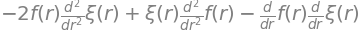

In [186]:
dlie_ddelta_f = sympy.diff(dlie_delta_f)
dlie_ddelta_f

In [187]:
dlie_delta_g = dg * xi
dlie_delta_g

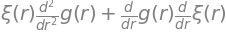

In [188]:
dlie_ddelta_g = sympy.diff(dlie_delta_g)
dlie_ddelta_g

In [189]:
dlie_delta_Phi = xi * dPhi
dlie_delta_Phi

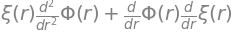

In [190]:
dlie_ddelta_Phi = dxi * dPhi + xi * ddPhi
dlie_ddelta_Phi

Substitute the expression for Phi".

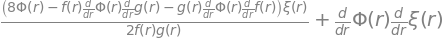

In [191]:
dlie_ddelta_Phi = xi * ddPhi_sol + dPhi * dxi
dlie_ddelta_Phi

### q part of action

Keep track of terms separately.

In [192]:
delta_f_terms = []
delta_g_terms = []
ddelta_f_terms = []
ddelta_g_terms = []
delta_Phi_terms = []
ddelta_Phi_terms = []

There are 7 terms.

##### Term 1

In [193]:
term1 = 3 * L ** 2 * sympy.sqrt(f * g) * ddelta_Phi ** 2 / 4
term1

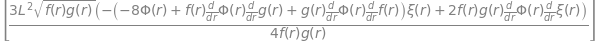

In [194]:
ddelta_Phi_terms.append(sympy.simplify(3 * L ** 2 * sympy.sqrt(f * g) * 2 * dlie_ddelta_Phi / 4))
ddelta_Phi_terms

##### Term 2

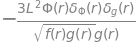

In [195]:
term2 = -3 * L ** 2 * Phi * delta_Phi * delta_g / (g * sympy.sqrt(f * g))
term2

In [196]:
delta_g_terms.append((-3 * L ** 2 * Phi) / (g * sympy.sqrt(f * g)) * dlie_delta_Phi)
delta_Phi_terms.append((-3 * L ** 2 * Phi) / (g * sympy.sqrt(f * g)) * dlie_delta_g)

##### Term 3

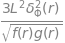

In [197]:
term3 = 3 * L ** 2 * delta_Phi ** 2 / sympy.sqrt(f * g)
term3

In [198]:
delta_Phi_terms.append(3 * L ** 2 * 2 * dlie_delta_Phi / sympy.sqrt(f * g))

##### Term 4

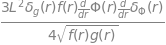

In [199]:
term4 = 3 * L ** 2 * delta_g * f * dPhi * ddelta_Phi / (4 * sympy.sqrt(f * g))
term4

In [200]:
ddelta_Phi_terms.append(sympy.simplify((3 * L ** 2 * f * dPhi) / (4 * sympy.sqrt(f * g)) * dlie_delta_g))
delta_g_terms.append(sympy.simplify((3 * L ** 2 * f * dPhi) / (4 * sympy.sqrt(f * g)) * dlie_ddelta_Phi))

##### Term 5

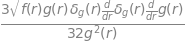

In [201]:
term5 = 3 * sympy.sqrt(f * g) * delta_g * ddelta_g * dg / (32 * g ** 2)
term5

In [202]:
delta_g_terms.append((3 * sympy.sqrt(f * g) * dg) / (32 * g ** 2) * dlie_ddelta_g)
ddelta_g_terms.append((3 * sympy.sqrt(f * g) * dg) / (32 * g ** 2) * dlie_delta_g)

##### Term 6

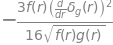

In [203]:
term6 = -3 * f * ddelta_g ** 2 / (16 * sympy.sqrt(f * g))
term6

In [204]:
ddelta_g_terms.append((-3 * f) / (16 * sympy.sqrt(f * g)) * 2 * dlie_ddelta_g)

##### Term 7

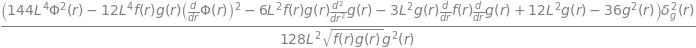

In [205]:
fac1 = 48 * L ** 4 * Phi ** 2 - 4 * L ** 4 * f * g * dPhi ** 2 - 2 * L ** 2 * f * g * ddg - L ** 2 * g * df * dg + 4 * L ** 2 * g - 12 * g ** 2
term7 = 3 * fac1 * delta_g ** 2 / (128 * L ** 2 * g ** 2 * sympy.sqrt(f * g))
term7

In [206]:
# Phi_s, C_s = sympy.symbols("Phi_s C_s")
# C_s = -(L ** 2 * r_0 ** 2 + r_0 ** 4) / L ** 4
# Phi_s = (f * g * dPhi ** 2 - C_s) / 4
# Phi_s

# fac1_simp = 48 * L ** 4 * Phi_s - 4 * L ** 4 * f * g * dPhi ** 2 - 2 * L ** 2 * f * g * ddg - L ** 2 * g * df * dg + 4 * L ** 2 * g - 12 * g ** 2
# fac1_simp

# fac1_simp.subs({f: f_sol, g: g_sol, df: df_sol, dg: dg_sol, ddg: ddg_sol}).expand().simplify()

In [207]:
delta_g_terms.append(3 * fac1 * 2 * dlie_delta_g / (128 * L ** 2 * sympy.sqrt(f * g ** 5)))

### f part of action

There are 5 terms.

##### Term 1

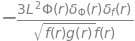

In [208]:
term1 = -3 * L ** 2 * Phi * delta_Phi * delta_f / (sympy.sqrt(f * g) * f)
term1

In [209]:
delta_f_terms.append((-3 * L ** 2 * Phi) / (sympy.sqrt(f * g) * f) * dlie_delta_Phi)
delta_Phi_terms.append((-3 * L ** 2 * Phi) / (sympy.sqrt(f * g) * f) * dlie_delta_f)

##### Term 2

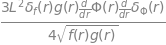

In [210]:
term2 = 3 * L ** 2 * delta_f * g * dPhi * ddelta_Phi / (4 * sympy.sqrt(f * g))
term2

In [211]:
delta_f_terms.append(sympy.simplify((3 * L ** 2 * g * dPhi) / (4 * sympy.sqrt(f * g)) * dlie_ddelta_Phi))
ddelta_Phi_terms.append(sympy.simplify((3 * L ** 2 * g * dPhi) / (4 * sympy.sqrt(f * g)) * dlie_delta_f))

##### Term 3

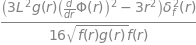

In [212]:
term3 = (3 * L ** 2 * g * dPhi ** 2 - 3 * r ** 2) * delta_f ** 2 / (16 * sympy.sqrt(f * g) * f)
term3

In [213]:
delta_f_terms.append((3 * L ** 2 * g * dPhi ** 2 - 3 * r ** 2) * 2 * dlie_delta_f / (16 * sympy.sqrt(f * g) * f))

##### Term 4

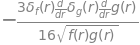

In [214]:
term4 = -3 * delta_f * ddelta_g * dg / (16 * sympy.sqrt(f * g))
term4

In [215]:
ddelta_g_terms.append((-3 * dg) / (16 * sympy.sqrt(f * g)) * dlie_delta_f)
delta_f_terms.append((-3 * dg) / (16 * sympy.sqrt(f * g)) * dlie_ddelta_g)

##### Term 5

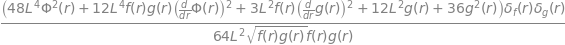

In [216]:
fac2 = 16 * L ** 4 * Phi ** 2 + 4 * L ** 4 * f * g * dPhi ** 2 + L ** 2 * f * dg ** 2 + 4 * L ** 2 * g + 12 * g ** 2
term5 = 3 * fac2 * delta_f * delta_g / (64 * L ** 2 * f * g * sympy.sqrt(f * g))
term5

In [217]:
delta_g_terms.append((3 * fac2) / (64 * L ** 2 * sympy.sqrt(f ** 3 * g ** 3)) * dlie_delta_f)
delta_f_terms.append((3 * fac2) / (64 * L ** 2 * sympy.sqrt(f ** 3 * g ** 3)) * dlie_delta_g)

### Total

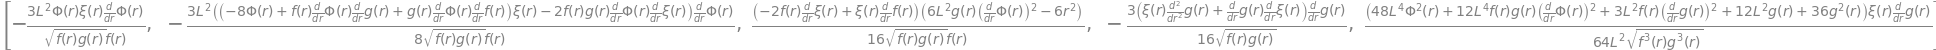

In [257]:
delta_f_terms

In [258]:
ddelta_f_terms

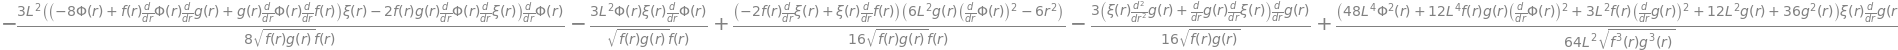

In [262]:
total_delta_f_term = sum(delta_f_terms)
total_delta_f_term

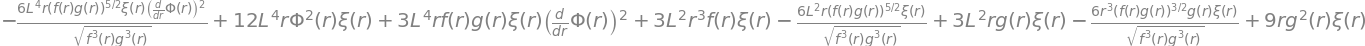

In [263]:
f_term_num = sympy.fraction(total_delta_f_term.subs({dg: dg_sol, ddg: ddg_sol, df: df_sol}).simplify())[0] / sympy.sqrt(f ** 3 * g ** 3)
f_term_num.simplify()

Substitute for Phi'.

In [264]:
C_s = sympy.symbols("C_s")
C_s = -(L ** 2 * r_0 ** 2 + r_0 ** 4) / L ** 4

In [265]:
f_term_num = -3 * C_s * L ** 4 * r * xi + 3 * L ** 2 * r ** 3 * f * xi - 6 * L ** 2 * r * f * g * xi + 3 * L ** 2 * r * g * xi - 6 * r ** 3 * g * xi + 9 * r * g ** 2 * xi
f_term_num

In [266]:
f_term_num.subs({f: f_sol, g: g_sol}).simplify()

##### g

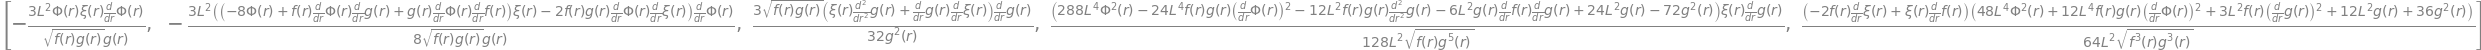

In [267]:
delta_g_terms

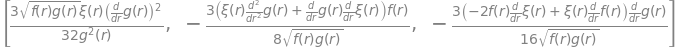

In [268]:
ddelta_g_terms

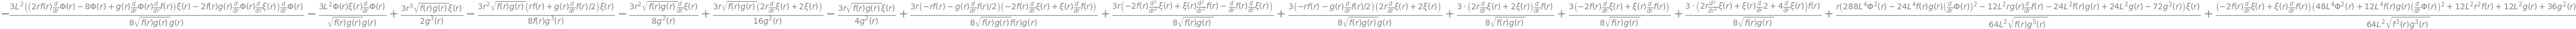

In [280]:
total_g_term = (sum(delta_g_terms) - sympy.diff(sum(ddelta_g_terms), r)).subs({dg: dg_sol, ddg: ddg_sol})
total_g_term

##### Phi

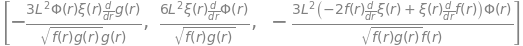

In [275]:
delta_Phi_terms

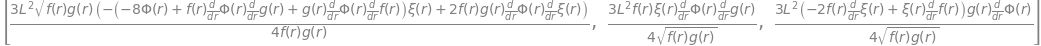

In [276]:
ddelta_Phi_terms

In [277]:
total_phi_term = (sum(delta_Phi_terms) - sympy.diff(sum(ddelta_Phi_terms), r)).simplify()
total_phi_term